In [ ]:
!pip install gradio==3.43.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      

In [ ]:
!pip install -U diffusers

In [ ]:
!pip install bitsandbytes

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

In [ ]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch

model_id = "stabilityai/stable-diffusion-3.5-medium"

nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model_nf4 = SD3Transformer2DModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=nf4_config,
    torch_dtype=torch.bfloat16
)

pipeline = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    transformer=model_nf4,
    torch_dtype=torch.bfloat16
)
pipeline.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [ ]:
pipeline

StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-3.5-medium",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
import gradio as gr
import numpy as np
import torch
import requests
import random
import os
import sys
import pickle
import tarfile
from PIL import Image

from tqdm.auto import tqdm
from datetime import datetime
from IPython.display import clear_output

import diffusers
from diffusers import DDIMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
import torch.nn.functional as F

In [ ]:
import torch
import base64
import gradio as gr
import numpy as np
from PIL import Image
from io import BytesIO

MAX_COLORS = 12


def create_binary_matrix(img_arr, target_color):
    mask = np.all(img_arr == target_color, axis=-1)
    binary_matrix = mask.astype(int)
    return binary_matrix

def preprocess_mask(mask_, h, w, device):
    mask = np.array(mask_)
    mask = mask.astype(np.float32)
    mask = mask[None, None]
    mask[mask < 0.5] = 0
    mask[mask >= 0.5] = 1
    mask = torch.from_numpy(mask).to(device)
    mask = torch.nn.functional.interpolate(mask, size=(h, w), mode='nearest')
    return mask

def process_sketch(canvas_data):
    binary_matrixes = []
    base64_img = canvas_data['image']
    image_data = base64.b64decode(base64_img.split(',')[1])
    image = Image.open(BytesIO(image_data)).convert("RGB")
    im2arr = np.array(image)
    colors = [tuple(map(int, rgb[4:-1].split(','))) for rgb in canvas_data['colors']]
    colors_fixed = []

    r, g, b = 255, 255, 255
    binary_matrix = create_binary_matrix(im2arr, (r,g,b))
    binary_matrixes.append(binary_matrix)
    binary_matrix_ = np.repeat(np.expand_dims(binary_matrix, axis=(-1)), 3, axis=(-1))
    colored_map = binary_matrix_*(r,g,b) + (1-binary_matrix_)*(50,50,50)
    colors_fixed.append(gr.update(value=colored_map.astype(np.uint8)))

    for color in colors:
        r, g, b = color
        if any(c != 255 for c in (r, g, b)):
            binary_matrix = create_binary_matrix(im2arr, (r,g,b))
            binary_matrixes.append(binary_matrix)
            binary_matrix_ = np.repeat(np.expand_dims(binary_matrix, axis=(-1)), 3, axis=(-1))
            colored_map = binary_matrix_*(r,g,b) + (1-binary_matrix_)*(50,50,50)
            colors_fixed.append(gr.update(value=colored_map.astype(np.uint8)))

    visibilities = []
    colors = []
    for n in range(MAX_COLORS):
        visibilities.append(gr.update(visible=False))
        colors.append(gr.update())
    for n in range(len(colors_fixed)):
        visibilities[n] = gr.update(visible=True)
        colors[n] = colors_fixed[n]

    return [gr.update(visible=True), binary_matrixes, *visibilities, *colors]

def process_prompts(binary_matrixes, *seg_prompts):
    return [gr.update(visible=True), gr.update(value=' , '.join(seg_prompts[:len(binary_matrixes)]))]

def process_example(layout_path, all_prompts, seed_):

    all_prompts = all_prompts.split('***')

    binary_matrixes = []
    colors_fixed = []

    im2arr = np.array(Image.open(layout_path))[:,:,:3]
    unique, counts = np.unique(np.reshape(im2arr,(-1,3)), axis=0, return_counts=True)
    sorted_idx = np.argsort(-counts)

    binary_matrix = create_binary_matrix(im2arr, (0,0,0))
    binary_matrixes.append(binary_matrix)
    binary_matrix_ = np.repeat(np.expand_dims(binary_matrix, axis=(-1)), 3, axis=(-1))
    colored_map = binary_matrix_*(255,255,255) + (1-binary_matrix_)*(50,50,50)
    colors_fixed.append(gr.update(value=colored_map.astype(np.uint8)))

    for i in range(len(all_prompts)-1):
        r, g, b = unique[sorted_idx[i]]
        if any(c != 255 for c in (r, g, b)) and any(c != 0 for c in (r, g, b)):
            binary_matrix = create_binary_matrix(im2arr, (r,g,b))
            binary_matrixes.append(binary_matrix)
            binary_matrix_ = np.repeat(np.expand_dims(binary_matrix, axis=(-1)), 3, axis=(-1))
            colored_map = binary_matrix_*(r,g,b) + (1-binary_matrix_)*(50,50,50)
            colors_fixed.append(gr.update(value=colored_map.astype(np.uint8)))

    visibilities = []
    colors = []
    prompts = []
    for n in range(MAX_COLORS):
        visibilities.append(gr.update(visible=False))
        colors.append(gr.update())
        prompts.append(gr.update())

    for n in range(len(colors_fixed)):
        visibilities[n] = gr.update(visible=True)
        colors[n] = colors_fixed[n]
        prompts[n] = all_prompts[n+1]

    return [gr.update(visible=True), binary_matrixes, *visibilities, *colors, *prompts,
            gr.update(visible=True), gr.update(value=all_prompts[0]), int(seed_)]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/diff/DenseDiffusion2024/DenseDiffusionColab')

#from utils import preprocess_mask, process_sketch, process_prompts, process_example


Mounted at /content/drive


In [ ]:
canvas_html = "<div id='canvas-root' style='max-width:400px; margin: 0 auto'></div>"
load_js = """
async () => {
const url = "https://huggingface.co/datasets/radames/gradio-components/raw/main/sketch-canvas.js"
fetch(url)
  .then(res => res.text())
  .then(text => {
    const script = document.createElement('script');
    script.type = "module"
    script.src = URL.createObjectURL(new Blob([text], { type: 'application/javascript' }));
    document.head.appendChild(script);
  });
}
"""

get_js_colors = """
async (canvasData) => {
  const canvasEl = document.getElementById("canvas-root");
  return [canvasEl._data]
}
"""

css = '''
#color-bg{display:flex;justify-content: center;align-items: center;}
.color-bg-item{width: 100%; height: 32px}
#main_button{width:100%}
<style>
'''

In [ ]:
global sreg, creg, sizereg, COUNT, creg_maps, sreg_maps, pipe, text_cond

sreg = 0
creg = 0
sizereg = 0
COUNT = 0
reg_sizes = {}
creg_maps = {}
sreg_maps = {}
text_cond = 0
device="cuda"
MAX_COLORS = 12


# pipe = diffusers.StableDiffusionPipeline.from_pretrained(
#         "runwayml/stable-diffusion-v1-5",
#         variant="fp16",
#         cache_dir='./models/diffusers/',
#         use_auth_token=HF_TOKEN).to(device)


In [ ]:
pipe=pipeline

clear_output()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
#pipe.scheduler.set_timesteps(50)
#timesteps = pipe.scheduler.timesteps
pipe.scheduler.set_timesteps(50)
timesteps = pipe.scheduler.timesteps
sp_sz = 64

with open('./dataset/valset.pkl', 'rb') as f:
    val_prompt = pickle.load(f)
val_layout = './dataset/valset_layout/'

TarFile = tarfile.open('./dataset/valset_layout.tar.gz')
TarFile.extractall('Valset_Layout')

In [ ]:
pipe.scheduler.set_timesteps(50)
timesteps = pipe.scheduler.timesteps

In [ ]:
def mod_forward(self, hidden_states, encoder_hidden_states=None, attention_mask=None, temb=None):

    residual = hidden_states

    if self.spatial_norm is not None:
        hidden_states = self.spatial_norm(hidden_states, temb)

    input_ndim = hidden_states.ndim

    if input_ndim == 4:
        batch_size, channel, height, width = hidden_states.shape
        hidden_states = hidden_states.view(batch_size, channel, height * width).transpose(1, 2)

    batch_size, sequence_length, _ = (hidden_states.shape if encoder_hidden_states is None else encoder_hidden_states.shape)
    attention_mask = self.prepare_attention_mask(attention_mask, sequence_length, batch_size)

    if self.group_norm is not None:
        hidden_states = self.group_norm(hidden_states.transpose(1, 2)).transpose(1, 2)

    query = self.to_q(hidden_states)

    global sreg, creg, COUNT, creg_maps, sreg_maps, reg_sizes, text_cond

    sa_ = True if encoder_hidden_states is None else False
    encoder_hidden_states = text_cond if encoder_hidden_states is not None else hidden_states

    if self.norm_cross:
        encoder_hidden_states = self.norm_encoder_hidden_states(encoder_hidden_states)

    key = self.to_k(encoder_hidden_states)
    value = self.to_v(encoder_hidden_states)

    query = self.head_to_batch_dim(query)
    key = self.head_to_batch_dim(key)
    value = self.head_to_batch_dim(value)

    if COUNT/32 < 50*0.3:

        dtype = query.dtype
        if self.upcast_attention:
            query = query.float()
            key = key.float()

        sim = torch.baddbmm(torch.empty(query.shape[0], query.shape[1], key.shape[1],
                                        dtype=query.dtype, device=query.device),
                            query, key.transpose(-1, -2), beta=0, alpha=self.scale)

        treg = torch.pow(timesteps[COUNT//32]/1000, 5)

        ## reg at self-attn
        if sa_:
            min_value = sim[int(sim.size(0)/2):].min(-1)[0].unsqueeze(-1)
            max_value = sim[int(sim.size(0)/2):].max(-1)[0].unsqueeze(-1)
            mask = sreg_maps[sim.size(1)].repeat(self.heads,1,1)
            size_reg = reg_sizes[sim.size(1)].repeat(self.heads,1,1)

            sim[int(sim.size(0)/2):] += (mask>0)*size_reg*sreg*treg*(max_value-sim[int(sim.size(0)/2):])
            sim[int(sim.size(0)/2):] -= ~(mask>0)*size_reg*sreg*treg*(sim[int(sim.size(0)/2):]-min_value)

        ## reg at cross-attn
        else:
            min_value = sim[int(sim.size(0)/2):].min(-1)[0].unsqueeze(-1)
            max_value = sim[int(sim.size(0)/2):].max(-1)[0].unsqueeze(-1)
            mask = creg_maps[sim.size(1)].repeat(self.heads,1,1)
            size_reg = reg_sizes[sim.size(1)].repeat(self.heads,1,1)

            sim[int(sim.size(0)/2):] += (mask>0)*size_reg*creg*treg*(max_value-sim[int(sim.size(0)/2):])
            sim[int(sim.size(0)/2):] -= ~(mask>0)*size_reg*creg*treg*(sim[int(sim.size(0)/2):]-min_value)

        attention_probs = sim.softmax(dim=-1)
        attention_probs = attention_probs.to(dtype)

    else:
        attention_probs = self.get_attention_scores(query, key, attention_mask)

    COUNT += 1

    hidden_states = torch.bmm(attention_probs, value)
    hidden_states = self.batch_to_head_dim(hidden_states)

    # linear proj
    hidden_states = self.to_out[0](hidden_states)
    # dropout
    hidden_states = self.to_out[1](hidden_states)

    if input_ndim == 4:
        hidden_states = hidden_states.transpose(-1, -2).reshape(batch_size, channel, height, width)

    if self.residual_connection:
        hidden_states = hidden_states + residual

    hidden_states = hidden_states / self.rescale_output_factor

    return hidden_states

# for _module in pipe.unet.modules():
#     if _module.__class__.__name__ == "Attention":
#         _module.__class__.__call__ = mod_forward

In [ ]:
from PIL import Image
from IPython.display import display

def process_generation(binary_matrixes, seed, creg_, sreg_, sizereg_, bsz, master_prompt, *prompts):
    global creg, sreg, sizereg
    creg, sreg, sizereg = creg_, sreg_, sizereg_

    clipped_prompts = prompts[:len(binary_matrixes)]
    prompts = [master_prompt] + list(clipped_prompts)
    layouts = torch.cat([preprocess_mask(mask_, sp_sz, sp_sz, device) for mask_ in binary_matrixes])

    text_input = pipe.tokenizer(prompts, padding="max_length", return_length=True, return_overflowing_tokens=False,
                                max_length=pipe.tokenizer.model_max_length, truncation=True, return_tensors="pt")
    cond_embeddings = pipe.text_encoder(text_input.input_ids.to(device))[0]

    uncond_input = pipe.tokenizer([""] * bsz, padding="max_length", max_length=pipe.tokenizer.model_max_length,
                                  truncation=True, return_tensors="pt")
    uncond_embeddings = pipe.text_encoder(uncond_input.input_ids.to(device))[0]

    # Prepare for sreg and creg
    global sreg_maps, reg_sizes
    sreg_maps = {}
    reg_sizes = {}
    for r in range(4):
        res = int(sp_sz / np.power(2, r))
        layouts_s = F.interpolate(layouts, (res, res), mode='nearest')
        layouts_s = (layouts_s.view(layouts_s.size(0), 1, -1) * layouts_s.view(layouts_s.size(0), -1, 1)).sum(0).unsqueeze(0).repeat(bsz, 1, 1)
        reg_sizes[np.power(res, 2)] = 1 - sizereg * layouts_s.sum(-1, keepdim=True) / (np.power(res, 2))
        sreg_maps[np.power(res, 2)] = layouts_s

    global creg_maps
    creg_maps = {}
    pww_maps = torch.zeros(1, 77, sp_sz, sp_sz).to(device)
    for i in range(1, len(prompts)):
        wlen = text_input['length'][i] - 2
        widx = text_input['input_ids'][i][1:1 + wlen]
        for j in range(77):
            try:
                if (text_input['input_ids'][0][j:j + wlen] == widx).sum() == wlen:
                    pww_maps[:, j:j + wlen, :, :] = layouts[i - 1:i]
                    cond_embeddings[0][j:j + wlen] = cond_embeddings[i][1:1 + wlen]
                    break
            except:
                raise gr.Error("Please check whether every segment prompt is included in the full text!")
                return

    for r in range(4):
        res = int(sp_sz / np.power(2, r))
        layout_c = F.interpolate(pww_maps, (res, res), mode='nearest').view(1, 77, -1).permute(0, 2, 1).repeat(bsz, 1, 1)
        creg_maps[np.power(res, 2)] = layout_c

    global text_cond
    text_cond = torch.cat([uncond_embeddings.unsqueeze(0).repeat(bsz, 1, 1), cond_embeddings[:1].repeat(bsz, 1, 1)], dim=1)

    global COUNT
    COUNT = 0

    if seed == -1:
        latents = torch.randn(bsz, 16, sp_sz, sp_sz).to(device)
    else:
        latents = torch.randn(bsz, 16, sp_sz, sp_sz, generator=torch.Generator().manual_seed(seed)).to(device)

    images = pipe(prompts[:1] * bsz, latents=latents).images


    for img in images:
        display(img)

    return images


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.43.2, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://06f84a8dcec3d4e822.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


  0%|          | 0/28 [00:00<?, ?it/s]

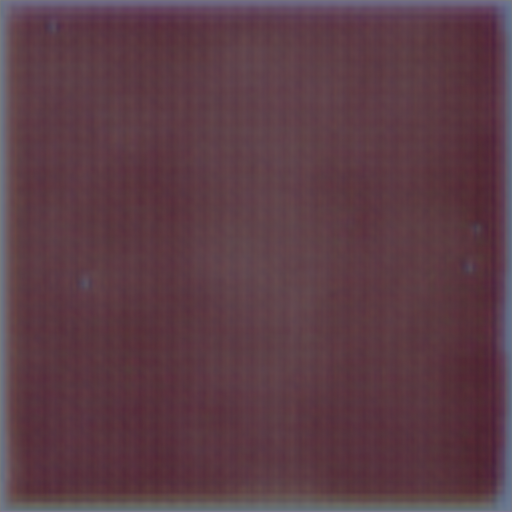

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://06f84a8dcec3d4e822.gradio.live


In [ ]:
#################################################
#################################################
### define the interface
with gr.Blocks(css=css) as demo:
    binary_matrixes = gr.State([])
    color_layout = gr.State([])
    gr.Markdown('''## DenseDiffusion: Dense Text-to-Image Generation with Attention Modulation''')
    gr.Markdown('''
    #### 😺 Instruction to generate images 😺 <br>
    (1) Create the image layout. <br>
    (2) Label each segment with a text prompt. <br>
    (3) Adjust the full text. The default full text is automatically concatenated from each segment's text. The default one works well, but refineing the full text will further improve the result. <br>
    (4) Check the generated images, and tune the hyperparameters if needed. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - w<sup>c</sup> : The degree of attention modulation at cross-attention layers. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - w<sup>s</sup> : The degree of attention modulation at self-attention layers. <br>
    ''')

    with gr.Row():
        with gr.Box(elem_id="main-image"):
            canvas_data = gr.JSON(value={}, visible=False)
            canvas = gr.HTML(canvas_html)
            button_run = gr.Button("(1) I've finished my sketch ! 😺", elem_id="main_button", interactive=True)

            prompts = []
            colors = []
            color_row = [None] * MAX_COLORS
            with gr.Column(visible=False) as post_sketch:
                for n in range(MAX_COLORS):
                    if n == 0 :
                        with gr.Row(visible=False) as color_row[n]:
                            colors.append(gr.Image(shape=(100, 100), label="background", type="pil", image_mode="RGB", width=100, height=100))
                            prompts.append(gr.Textbox(label="Prompt for the background (white region)", value=""))
                    else:
                        with gr.Row(visible=False) as color_row[n]:
                            colors.append(gr.Image(shape=(100, 100), label="segment "+str(n), type="pil", image_mode="RGB", width=100, height=100))
                            prompts.append(gr.Textbox(label="Prompt for the segment "+str(n)))

                get_genprompt_run = gr.Button("(2) I've finished segment labeling ! 😺", elem_id="prompt_button", interactive=True)

            with gr.Column(visible=False) as gen_prompt_vis:
                general_prompt = gr.Textbox(value='', label="(3) Textual Description for the entire image", interactive=True)
                with gr.Accordion("(4) Tune the hyperparameters", open=False):
                    creg_ = gr.Slider(label=" w\u1D9C (The degree of attention modulation at cross-attention layers) ", minimum=0, maximum=2., value=1.0, step=0.1)
                    sreg_ = gr.Slider(label=" w \u02E2 (The degree of attention modulation at self-attention layers) ", minimum=0, maximum=2., value=0.3, step=0.1)
                    sizereg_ = gr.Slider(label="The degree of mask-area adaptive adjustment", minimum=0, maximum=1., value=1., step=0.1)
                    bsz_ = gr.Slider(label="Number of Samples to generate", minimum=1, maximum=4, value=1, step=1)
                    seed_ = gr.Slider(label="Seed", minimum=-1, maximum=999999999, value=-1, step=1)

                final_run_btn = gr.Button("Generate ! 😺")

                layout_path = gr.Textbox(label="layout_path", visible=False)
                all_prompts = gr.Textbox(label="all_prompts", visible=False)

        with gr.Column():
            out_image = gr.Gallery(label="Result", columns=2, height='auto')

    button_run.click(process_sketch, inputs=[canvas_data], outputs=[post_sketch, binary_matrixes, *color_row, *colors], _js=get_js_colors, queue=False)

    get_genprompt_run.click(process_prompts, inputs=[binary_matrixes, *prompts], outputs=[gen_prompt_vis, general_prompt], queue=False)

    final_run_btn.click(process_generation, inputs=[binary_matrixes, seed_, creg_, sreg_, sizereg_, bsz_, general_prompt, *prompts], outputs=out_image)

    gr.Examples(
        examples=[['./Valset_Layout/valset_layout/0.png',
                   '***'.join([val_prompt[0]['textual_condition']] + val_prompt[0]['segment_descriptions']), 381940206],
                  ['./Valset_Layout/valset_layout/1.png',
                   '***'.join([val_prompt[1]['textual_condition']] + val_prompt[1]['segment_descriptions']), 307504592],
                  ['./Valset_Layout/valset_layout/5.png',
                   '***'.join([val_prompt[5]['textual_condition']] + val_prompt[5]['segment_descriptions']), 114972190]],
        inputs=[layout_path, all_prompts, seed_],
        outputs=[post_sketch, binary_matrixes, *color_row, *colors, *prompts, gen_prompt_vis, general_prompt, seed_],
        fn=process_example,
        run_on_click=True,
        label='😺 Examples 😺',
    )

    demo.load(None, None, None, _js=load_js)

demo.launch(share=True,inline=False,debug=True)


In [ ]:
# import diffusers
# import transformers
# print("Diffusers version:", diffusers.__version__)
# print("Transformers version:", transformers.__version__)


Diffusers version: 0.31.0
Transformers version: 4.47.1
